<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 5 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 17 February 2022</div>


<h1>Topics<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Measures-of-central-tendency" data-toc-modified-id="Measures-of-central-tendency-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Measures of central tendency</a></span></li><li><span><a href="#Measures-of-Variability" data-toc-modified-id="Measures-of-Variability-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Measures of Variability</a></span></li><li><span><a href="#Covariance-and-Correlation" data-toc-modified-id="Covariance-and-Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Covariance and Correlation</a></span><ul class="toc-item"><li><span><a href="#Spearman-Correlation" data-toc-modified-id="Spearman-Correlation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Spearman Correlation</a></span></li><li><span><a href="#Pearson-Correlation" data-toc-modified-id="Pearson-Correlation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pearson Correlation</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Correlation-does-not-simply-imply-causation" data-toc-modified-id="Correlation-does-not-simply-imply-causation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Correlation does not imply causation</a></span></li></ul></li></ul></div>

# A Review of Statistics

We've done some road already. We got comfortable with python's main data structures and visited the foundation of data science: Probability theory. It allows us to build models to predict the future with, and that is what Data Science is all about.

>**Note**: In truth, Data Science is all about looking at the data and going back to the ***past*** by building the models that gave rise to the data. 
<left>
<img src="ipynb.images/minion-confused.png" width=100 />
</left>

>But the reason we want to visit the **past** is in order to build the **model** that will help us to predict the **future**, just like meteorology :-)

We also went from using collections like `lists` and `sets` that represent equiprobable events, to using `dictionaries` that represent non-equiprobable events and used them to do sport analytics. We are now ready to move from **finite** dictionaries over to **infinite** dictionaries: In other words, **functions**, and as a result to move from probabilities to **statistics**.

>**Definition**: Statistics has many definitions, but I like to think of the science as one that describes measures of central tendencies, measures of variability, and measures of relationship amongst data. It does so with mathematical objects called **moments**.

Let's start by introducing the main **moments** in statistics.

We're going to use the `500 Person Gender-Height-Weight-Body Mass Index` dataset, composed of the following features:

Gender : Male / Female <br>
Height : Number (cm) <br>
Weight : Number (Kg) <br>
Index : <br>
0 - Extremely Weak <br>
1 - Weak <br>
2 - Normal <br>
3 - Overweight <br>
4 - Obesity <br>
5 - Extreme Obesity

## Preprocessing

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv("data3/500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
df.shape


(500, 4)

In [7]:
import os

os.getcwd()

'C:\\Users\\zeeni\\OneDrive\\Documents\\NEU\\Sem 2\\DSEM\\W5L2'

## 1. Measures of *central* tendency

>The **Mean** is a measure of ***central*** tendency. 

The **mean** is the **arithmetic average** of a set of numbers, or **distribution**. It is the most commonly used measure of central tendency of a set of numbers.

The mean is normally used for normal distributions. It does not make a lot of sense in non-normal distributions, even though we continue using it for all kinds of distributions.

The mean is *not* a robust tool since it is largely influenced by outliers (making our results not truly describe our data mean distribution).

It is a good idea to calculate both **mean** *and* **mode** (defined further below) in order to check if the mean value has been affected by any outliers. numeric value separating the higher half of a sample, a population, or a probability distribution, from the lower half.

A mean is computed by adding up all the values and dividing that score by the number of values.

In [38]:
print("The mean height of all the people in this dataset is equal to: ", 
      df.Height.mean(), "cm")
print("The mean weight of all the people in this dataset is equal to: ", 
      df.Weight.mean(), "kg")

The mean height of all the people in this dataset is equal to:  169.944 cm
The mean weight of all the people in this dataset is equal to:  106.0 kg


>The **Median** is a measure of ***central*** tendency. 

**Median** is the midpoint or the *middle* value in your orderly ascending dataset. 

The median is generally used for **skewed** (i.e. non-normal) distributions.

The median is better suited for skewed distributions to evaluate a central tendency with since it is much more robust and sensible.

The Median is the number found at the exact middle of the set of values. A median can be computed by listing all numbers in ascending order and then locating the number in the centre of that distribution.

- Arrange your numbers in numerical order.
- Count how many numbers you have.
- If you have an odd number, divide by 2 and round up to get the position of the median number.
- If you have an even number, divide by 2. Go to the number in that position and average it with the number in the next higher position to get the median.

In [39]:
print("The median height of all the people in this dataset is equal to: ", 
      df.Height.median(), "cm")
print("The median weight of all the people in this dataset is equal to: ", 
      df.Weight.median(), "kg")

The median height of all the people in this dataset is equal to:  170.5 cm
The median weight of all the people in this dataset is equal to:  106.0 kg


>The **Mode** is a measure of ***central*** tendency

It shows the value that occurs *most* often (it can be used also with categorical data in pandas). If there is not a single value appears more than once or more than others, you say *there is no mode*.

In [40]:
print("The mode height of all the people in this dataset is equal to: ", 
      df.Height.mode(), "\n")
print("The mode weight of all the people in this dataset is equal to: ", 
      df.Weight.mode())

The mode height of all the people in this dataset is equal to:  0    188
dtype: int64 

The mode weight of all the people in this dataset is equal to:  0     50
1     80
2    104
dtype: int64


### Boxplots and histograms
The **boxplot** of the dataset tell us about *all possible values* in the dataset.

**Histograms** are a way to *summarize* distributions. The distribution is split into categories or *bins* - usually of equal size. The size of the bins is arbitrary - whatever works best for the task at hand.

The number of samples falling into each bin are counted - this is the frequency. They are then plotted as adjacent rectangles akin to a bar-chart. The profile of a histogram approximates probability distribution of the population.

Let's plot the measures of central tendency for the **heights** and **weights** of our dataset on top of the **histogram** *and* **bixplot**:

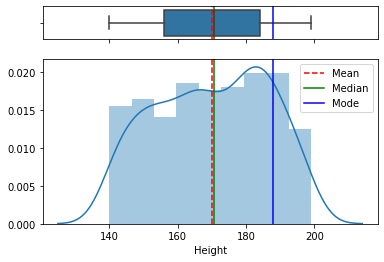

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Height'].mean()
median=df['Height'].median()
mode=df['Height'].mode()[0]

sns.boxplot(df["Height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["Height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

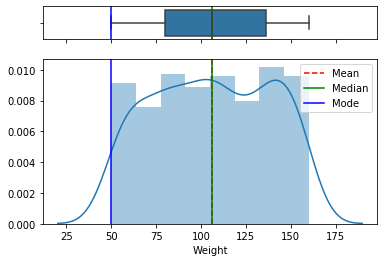

In [44]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Weight'].mean()
median=df['Weight'].median()
mode=df['Weight'].mode()[0]

sns.boxplot(df["Weight"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["Weight"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

In [45]:
print("The most popular gender in the dataset is: ", 
      df.Gender.mode())

The most popular gender in the dataset is:  0    Female
dtype: object


## 2. Measures of *Variability* (or *Spread*)

The **Range** is the *difference* between the largest and smallest values in our data (measures the range of values in which our dataset is distributed).

The **Variance** is calculated by computing the difference between every data point and the mean, squaring that value and summing for all available data points. 

In the end, the variance is calculated by dividing the sum by the total number of available points. 

*Squaring* helps us to not have dispersion negative values, and amplifies the effect of large differences. 

The problem with Variance is that because of the squaring, it is not in the same unit of measurement as the original data.

That is why the **Standard Deviation** is used more often because it is in the *original unit*. The standard deviation is equal to the squared root of the variance.

In [46]:
print("The variance height of all the people in this dataset is equal to: ", 
      df.Height.var())
print("The standard deviation weight of all the people in this dataset is equal to: ", 
      df.Weight.std())

The variance height of all the people in this dataset is equal to:  268.1491623246496
The standard deviation weight of all the people in this dataset is equal to:  32.38260746964435


**Interquartile range** (IQR): The data is sorted into ascending order and divided into **four** quarters. 

IQR measures then the variability between the upper (75th) and lower (25th) quartiles (measures the interval of values where the *majority* of values lies in).

In [47]:
quartiles = [0.25, 0.5, 0.75]
print("The Quartiles height of all the people in this dataset is equal to:\n", 
      df.Height.quantile(q=quartiles), "\n")
print("The Quartiles weight of all the people in this dataset is equal to:\n", 
      df.Weight.quantile(q=quartiles), "\n")

The Quartiles height of all the people in this dataset is equal to:
 0.25    156.0
0.50    170.5
0.75    184.0
Name: Height, dtype: float64 

The Quartiles weight of all the people in this dataset is equal to:
 0.25     80.0
0.50    106.0
0.75    136.0
Name: Weight, dtype: float64 



All this analysis could have being done using just the Pandas `describe` function!

In [48]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Let's plot a normal distribution:

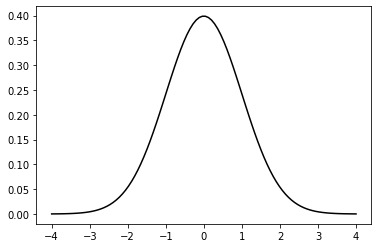

In [49]:
import scipy.stats as stats
mu, std = 0, 1
xmin, xmax = [-4, 4]
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k')
plt.show()

The 20th percentile indicates that 20% of all values are lower than this value - the shaded region below:

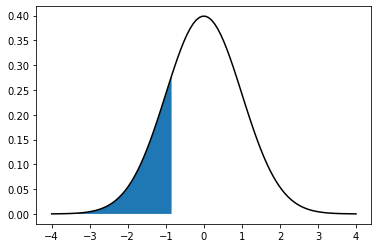

In [50]:
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.2)))
plt.show()

There are four percentiles that get their own name:
* 25th percentile is also known as the first quartile (Q1)
* 50th percentile as the median or second quartile (Q2)
* 75th percentile as the third quartile (Q3) 
* Interquartile (IQ) range range from Q1 to Q3.

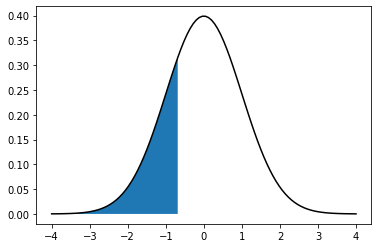

In [51]:
# First quartile (Q1)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.25)))
plt.show()

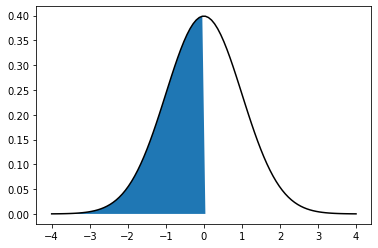

In [52]:
# Median or second quartile (Q2)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.5)))
plt.show()

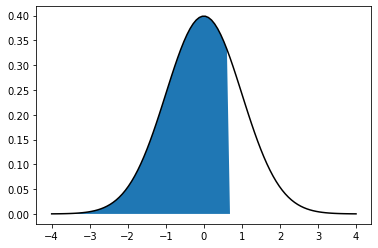

In [53]:
# Third quartile (Q3)
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.norm.ppf(0.75)))
plt.show()

-0.6744897501960817
0.6744897501960817


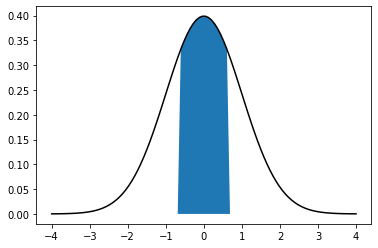

In [54]:
# * Interquartile (IQ) range range from Q2 to Q3.
plt.plot(x, p, 'k')

plt.fill_between(x, 0, p, interpolate=True,
                 where=((x>=stats.norm.ppf(0.25)) & (x<=stats.norm.ppf(0.75))))
print (stats.norm.ppf(0.25))
print (stats.norm.ppf(0.75))


plt.show()

### Variance and standard deviation

These are the most commonly used measures of **spread**. The sample variance is:

$$ v = \frac{1}{N-1} \sum_{i=1}^{N} \left( x_i - \bar{x}\right)^2 ,$$

where $N$ is the number of measurements, $x_i$ is the individual measurement and $\bar{x}$ is the sample mean. We can interpret this expression (almost) as the average of squared distances from the sample mean. Indeed, this intuitively gives us the spread. However, rather than the expected $\frac{1}{N}$ we have $\frac{1}{N-1}$. This is known as Bessel’s correction and it corrects the bias in the estimation of the population variance.

The sample standard deviation is the square root of the sample variance: $s = \sqrt{v}$. It gives a measure of spread in the same units as the measurements themselves.

### Example

Ok, enough about people! Let's look at dogs. 

So, Rottweilers are tall dogs. And Dachshunds are a bit short. How do we quantify this statement?

Here are the heights of Rottweilers, Dachshunds, and other more normally-sized dogs (in millimeters):

<br />
<left>
<img src="ipynb.images/dog-heights.gif" width=600 />
</left>

The mean (average) height is 394 mm. Let's plot this:

<br />
<left>
<img src="ipynb.images/dog-heights-and-mean.gif" width=600 />
</left>

Each dog's difference from the Mean is:

<br />
<left>
<img src="ipynb.images/dog-heights-and-difference.gif" width=600 />
</left>

The Standard Deviation shows us which heights are within one Standard Deviation (147mm) of the Mean:

<br />
<left>
<img src="ipynb.images/dogs-standard-deviation.gif" width=600 />
</left>

Using the Standard Deviation, we have a "**standard**" way of knowing what is **normal**, and what is **extra large* or **extra small**, and thanks to [math is fun](https://www.mathsisfun.com/data/standard-deviation.html) for that!

You can expect about 68% of values to be within plus-or-minus 1 standard deviation.

<br />
<left>
<img src="ipynb.images/68.svg" width=400 />
</left>

## 3. Measures of relationship: Covariance and Correlation

**Covariance** is a measure that indicates *how two variables are related from a linear perspective*. 

A positive covariance means the variables are positively linearly related, while a negative covariance means the variables are inversely linearly related. 

Correlation is covariance renormalized so it has no units and is expressed in %.

If two variables are positively correlated, increasing one will increase also the other. 

If two variables or negatively correlated, decreasing the value of one will make the other increase in value.

>**Note**: To be able to predict $y$ from $X$, $y$ needs to be correlated to at least some columns or combination of coluymns of $X$. We can compute correlation coefficients, but these will only tell us whether **linear correlation** exists. It could also be that the dependent variable is non-linearly correlated with the independent ones. In which case, modern math struggles to find the relationship. But deep lerning ANNs are quite good at detecting non-linear relationships.

With this measure, we can determine whether units increase or decrease together, but it is impossible to measure the ***degree*** with which the variables move together because covariance does not use one standard unit of measurement.

In [57]:
covariance = df['Height'].cov(df['Weight'])
print('Covariance with Pandas (Height vs Weight) = %0.2f' % covariance)

Covariance with Pandas (Height vs Weight) = 0.24


In [58]:
covariance = df['Index'].cov(df['Weight'])
print('Covariance with Pandas (Index vs Weight) = %0.2f' % covariance)

Covariance with Pandas (Index vs Weight) = 35.30


**Correlation** is a unit of measure that *standardizes* the measure of linear interdependence between two variables and, consequently, tells us *how closely* the two variables move. 

The correlation measurement, called a **correlation coefficient**, will always take on a value between -1 and 1. 

If the correlation coefficient is equal to 1, the two variables are in perfect positive linear correlation (if one increases, the other variable increases by the same amount). 

If the correlation coefficient is equal to -1, the two variables are in perfect negative linear correlation (if one variable decreases, the other decreases by the same amount). 

If the correlation coefficient is equal to 0, there is no linear correlation between the two variables (if one variable changes value, that doesn't give us any information about if the other variable is going to change as well or not). 

The correlation value is the same regardeless of the unit system we are working with.

In [59]:
correlation = df['Height'].corr(df['Weight']) 
print('Correlation in metric system (Height vs Weight) = %0.2f' % correlation)

Correlation in metric system (Height vs Weight) = 0.00


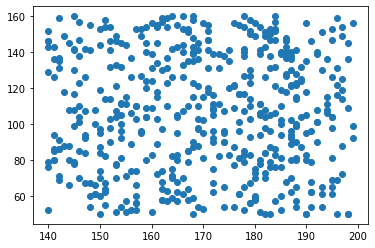

In [60]:
plt.scatter(df.Height, df.Weight)

In [61]:
correlation = df['Index'].corr(df['Weight']) 
print('Correlation in metric system (Index vs Weight) = %0.2f' % correlation)

Correlation in metric system (Index vs Weight) = 0.80


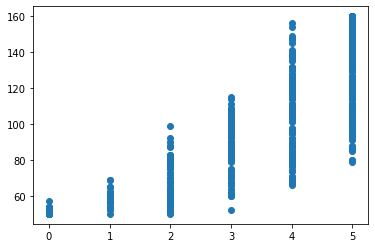

In [62]:
plt.scatter(df.Index, df.Weight)

**Pairplots** plot all columns of a dataset against each other, and tell us how columns re related to one another.

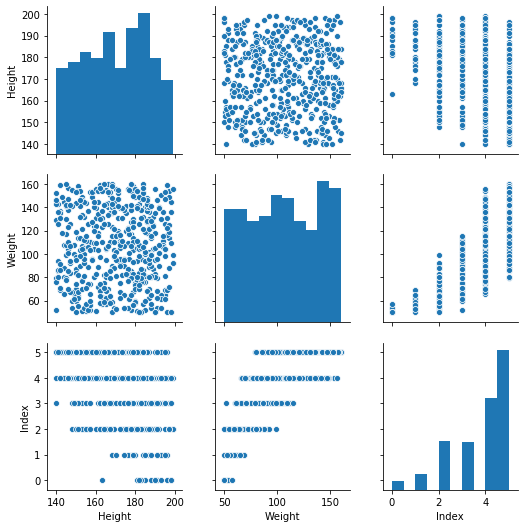

In [63]:
sns.pairplot(df)

### Spearman Correlation

**Spearman correlation** forgets the variables values and consider only their relative position (rank). By ranking the data, the lowest person will have its Height ranked as 1 and the lightest person will have its Weight ranked as 1. 

Spearman correlation assesses monotonic relationships, *whether linear or not*.

In [64]:
df[["Height", "Weight"]].head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [65]:
df[["Height", "Weight"]].rank().head()

,Height,Weight
0,278.5,203.5
1,435.0,165.0
2,389.0,274.5
3,474.5,239.0
4,66.0,53.0


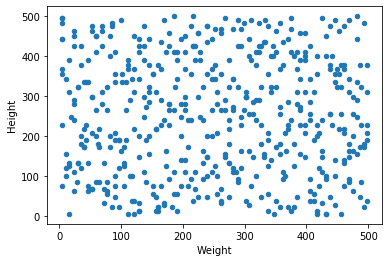

In [66]:
df[["Height", "Weight"]].rank().plot.scatter(x ="Weight", y="Height")

### Pearson Correlation

**Pearson Correlation** is simply the correlation between the rank coefficients, or in simpler terms the correlation between the *positions on the podium* for Height, and *positions on the podium* for Weight.

"*The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not)*."       - Wikipedia

In [69]:
ranked_data = df[["Height", "Weight"]].rank()
ranked_data["Height"].corr(ranked_data["Weight"])

-0.0012863887864474118

In [70]:
df['Weight'].corr(df['Height'], method='spearman')

-0.0012863887864474118

In [71]:
df['Weight'].corr(df['Height'], method='pearson')

0.0004459451283053304

In [72]:
df['Weight'].corr(df['Height'])

0.0004459451283053304

### Correlation Matrix

t**Correlation Matrices** are used to take a look a the correlation between *all variables in the dataset*.

In [18]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


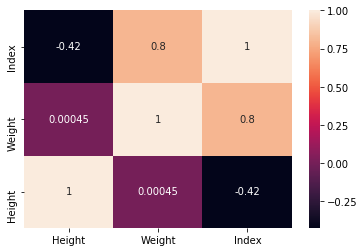

In [33]:
sns.heatmap(df.corr(), annot=True)

### Correlation does not imply causation!

Causation takes a ***giant*** step further from Correlation. It says that any change in the value of one variable ***will cause*** a change in the value of another variable, which means one variable makes the other to happen. It is also referred as **cause and effect**. <br> 

In some cases, there might be some hidden (also called **latent**) variables (of which we are not aware) which causes two variables to be correlated. In this case it is the effect of the latent variable which makes us believe the two variables are correlated, even if that's not naturally true.

## Plotting numbers is more powerful than tabulating them

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


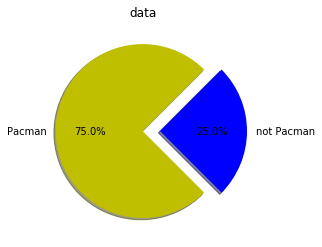

In [34]:
import matplotlib.pyplot as plt
from numpy import *
 
# This is your data to plot
data = array([['Pacman','not Pacman'],[270, 90]])
name=data[0]
stat=data[1]
explode=(0,0.2)
colors=['y','b']
fig=plt.figure()
plt.pie(stat,labels=name,autopct='%1.1f%%',explode=explode,startangle=45,colors=colors,shadow=True)
plt.title('data')
plt.axes().set_aspect('equal') # Make the aspect ratio equal.
plt.show()